In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import h5py 

In [3]:
file = '/Users/straniero/Documents/Dphil/data_SPS/SPS.BQHT_MD4_20181108_222234.h5'

In [4]:
def print_structure(name, obj):
    print(name)

with h5py.File(file, 'r') as f:
    f.visititems(print_structure)


horizontal
horizontal/delta
horizontal/sigma
vertical
vertical/delta


In [5]:
# Open the file in read mode
with h5py.File(file, 'r') as f:
    # List all groups
    print("Keys:", list(f.keys()))
    
    # Access a dataset
    data = f['vertical/delta'][:]  # Read it as a NumPy array
    #print(data)


Keys: ['horizontal', 'vertical']


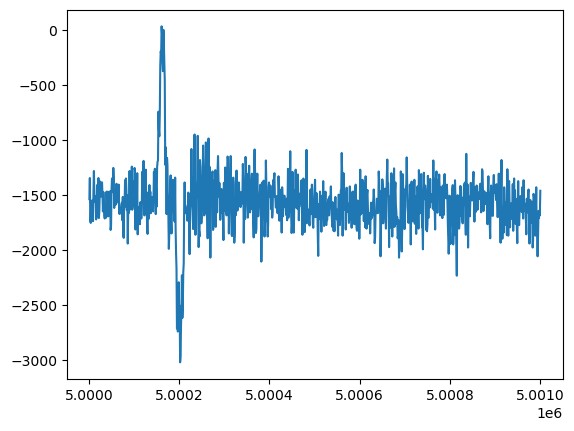

In [6]:
x = np.linspace(1,10000000,10000000)
#plt.plot(x,data)
plt.plot(x[5000000:5001000],data[5000000:5001000])

In [7]:
mean = np.mean(data)
data2 = data - mean

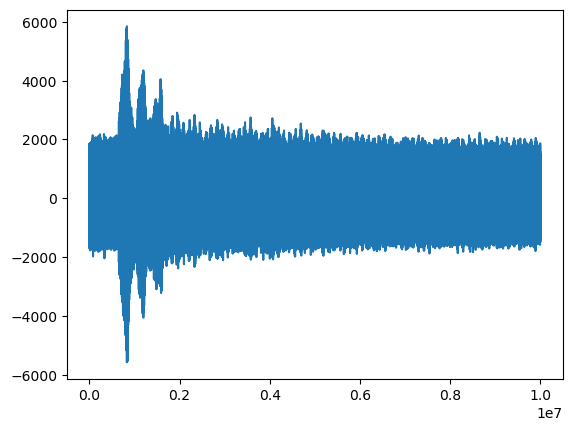

In [8]:
plt.plot(x,data2)
a = 5000000
b = 5002000


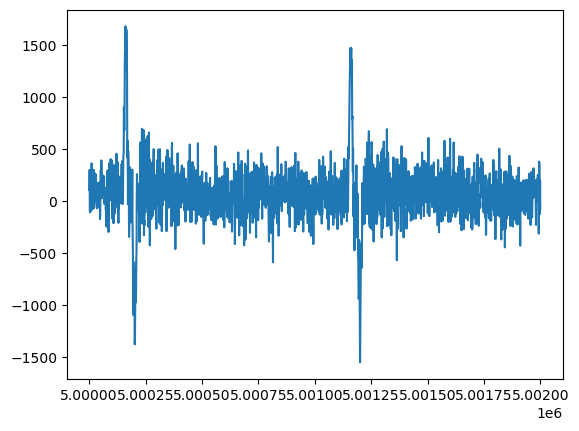

In [9]:
plt.plot(x[a:b],data2[a:b])

In [10]:
positions = np.zeros(1)
for idx, x in enumerate(data2):
    if x> 1800:
        positions= np.append(positions, idx)

positions_refined = np.zeros(1)

for idx, x in enumerate(positions):
    if x-positions[idx-1] >1:
        positions_refined = np.append(positions_refined, x)

In [11]:
delta_pos = np.diff(positions_refined[1548:])


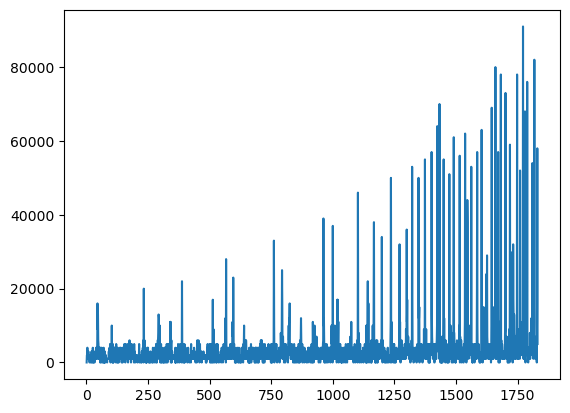

In [12]:
x1 = np.linspace(1,len(delta_pos),len(delta_pos))
plt.plot(x1,delta_pos)

(array([225., 675., 173., 134., 188.,   0., 183.,  67.,  23.,  12.,  11.,
          0.,  28.,  22.,  12.,   4.,   0.,   0.,   7.,   7.,   6.,   2.,
          0.,   0.,   2.,   1.,   3.,   1.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   1.,   0.,   2.,   1.,   0.,   1.,   0.,   1.,
          1.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   2.,   1.,
          2.,   1.,   3.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.00000000e+00, 8.29290909e+02, 1.65658182e+03, 2.48387273e+03,
        3.31116364e+03, 4.13845455e+03, 4.96574545e+03, 5.79303636e+03,
        6.62032727e+03, 7.44761818e+03, 8.27490909e+03, 9.10220000e+03,
        9.92949091e+03, 1.07567818e+04, 1.

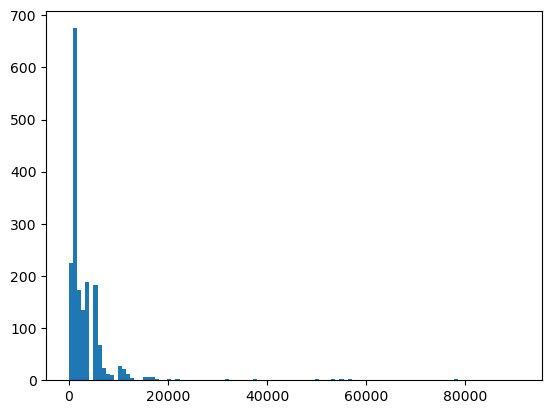

In [13]:
plt.hist(delta_pos, bins=110)

In [14]:
data3 = np.empty((10000,1000))
for i in range(10000):
    data3[i,:] = data2[i*1000:(i+1)*1000]

In [15]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

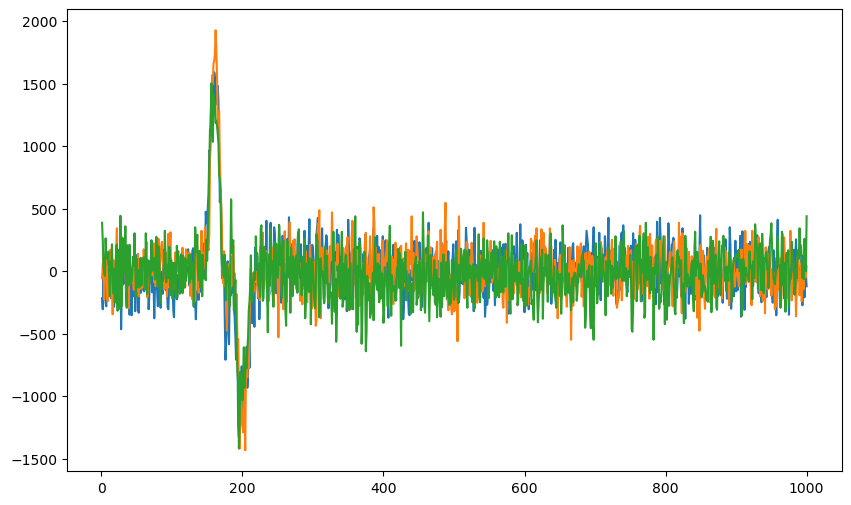

In [16]:
x3= np.linspace(1,1000,1000)
plt.figure(figsize=(10,6))
plt.plot(x3,data3[10,:])
plt.plot(x3,data3[500,:])
plt.plot(x3,data3[9000,:])

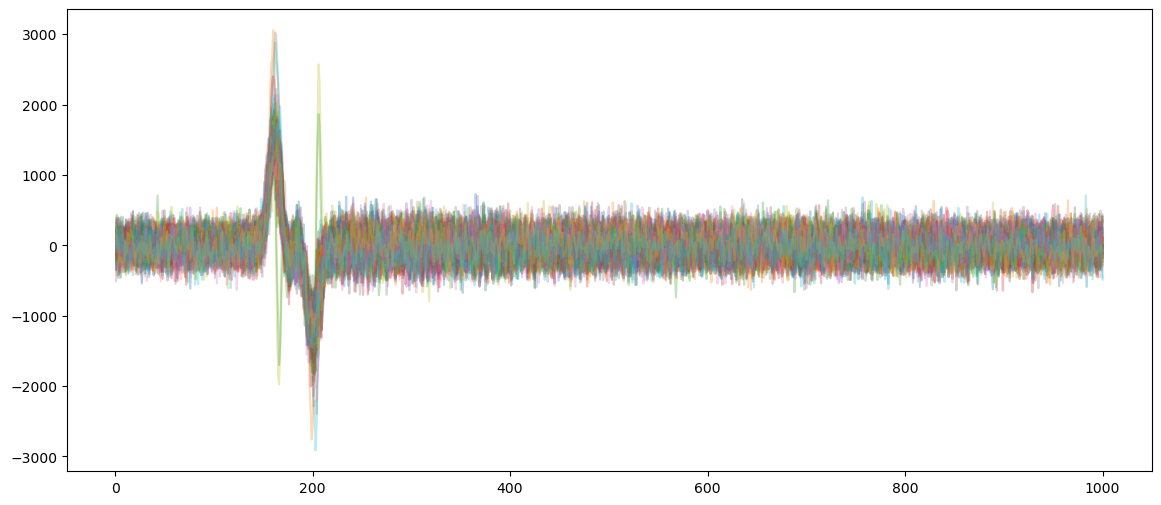

In [17]:
plt.figure(figsize=(14,6))
for i in range(100):
    plt.plot(x3,data3[i*100,:], alpha=0.3)

## Horizontal Delta

In [18]:
# Open the file in read mode
with h5py.File(file, 'r') as f:
    # List all groups
    print("Keys:", list(f.keys()))
    
    # Access a dataset
    data_vert_delta = f['vertical/delta'][:]  # Read it as a NumPy array
    #print(data)

Keys: ['horizontal', 'vertical']


In [19]:
data3_vert_delta = np.empty((10000,1000))
for i in range(10000):
    data3_vert_delta[i,:] = data_vert_delta[i*1000:(i+1)*1000]

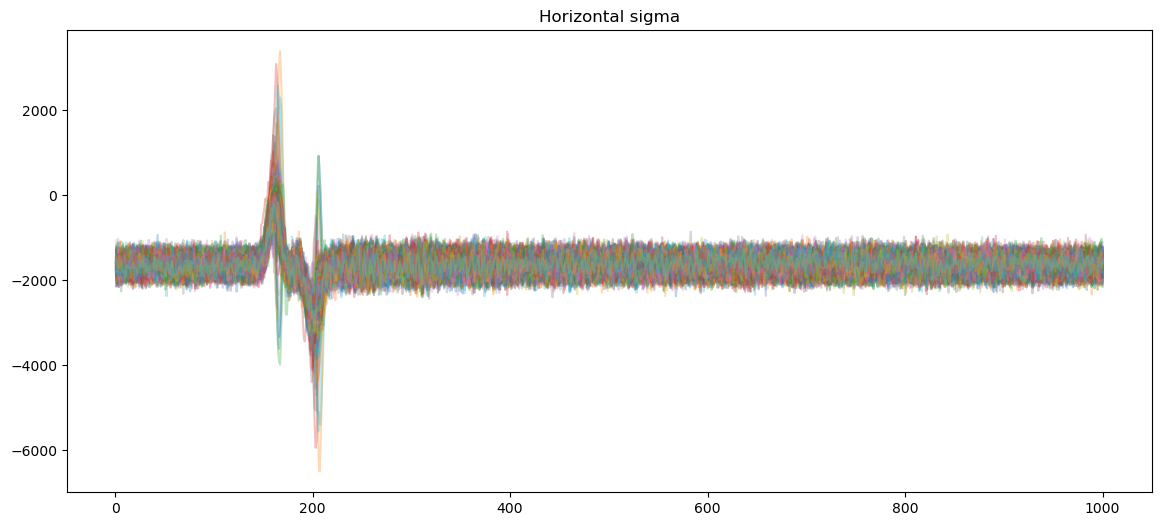

In [20]:
x3= np.linspace(1,1000,1000)
plt.figure(figsize=(14,6))
plt.title("Horizontal sigma")
for i in range(500):
    plt.plot(x3[:],data3_vert_delta[i*20,:], alpha=0.3)

### Sigma


In [21]:
# Open the file in read mode
with h5py.File(file, 'r') as f:
    # List all groups
    print("Keys:", list(f.keys()))
    
    # Access a dataset
    data_sigma = f['horizontal/sigma'][:]  # Read it as a NumPy array
    #print(data)

Keys: ['horizontal', 'vertical']


In [22]:
mean_sigma = np.mean(data_sigma)
#data_sigma2 = data_sigma - mean_sigma

data3_sigma = np.empty((10000,1000))
for i in range(10000):
    data3_sigma[i,:] = data_sigma[i*1000:(i+1)*1000]

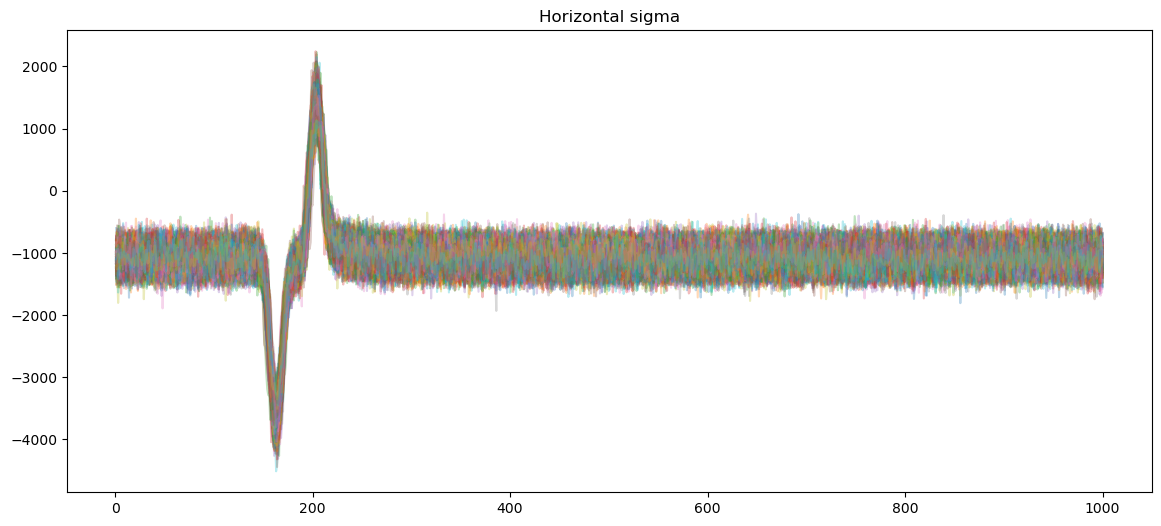

In [23]:

plt.figure(figsize=(14,6))
plt.title("Horizontal sigma")
for i in range(500):
    plt.plot(x3[:],data3_sigma[i*20,:], alpha=0.3)

### ANIMATION

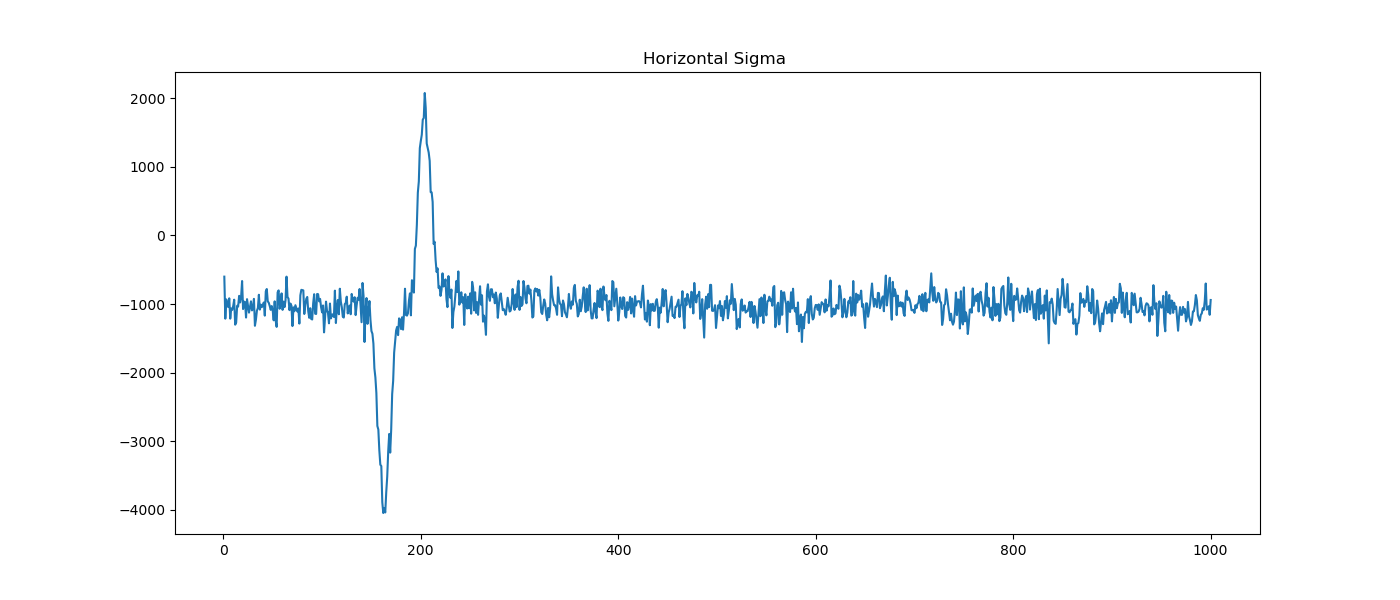

In [24]:
import matplotlib.animation as animation
%matplotlib ipympl

fig, ax = plt.subplots(figsize=(14, 6))
graph, = ax.plot(x3, data3_sigma[0, :])
ax.set_title("Horizontal Sigma ")
# Add a text box to display the frame number
frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.7))

def update(frame):
    graph.set_ydata(data3_sigma[frame*50, :])
    frame_text.set_text(f'Bunch: {frame*50}')
    return graph, frame_text

ani = animation.FuncAnimation(fig, update, frames=range(200), blit=False, interval=50, repeat=False)
#ani.save('vertical_sigma_evolution.mp4', writer='ffmpeg', fps=20)




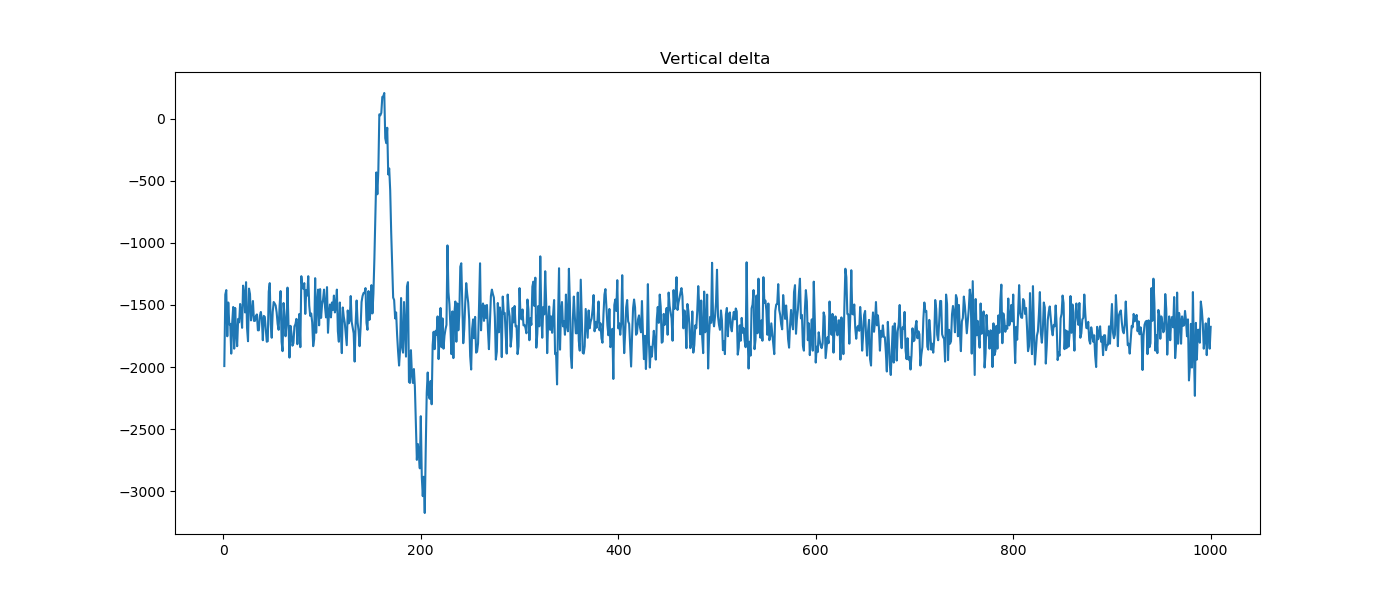

In [25]:
import matplotlib.animation as animation
%matplotlib ipympl

fig, ax = plt.subplots(figsize=(14, 6))
graph, = ax.plot(x3, data3_vert_delta[0, :])
ax.set_title("Vertical delta ")
# Add a text box to display the frame number
frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.7))

def update(frame):
    graph.set_ydata(data3_vert_delta[frame, :])
    frame_text.set_text(f'Bunch: {frame}')
    return graph, frame_text

ani = animation.FuncAnimation(fig, update, frames=range(500,1000), blit=False, interval=50, repeat=False)
#ani.save('vertical_sigma_evolution.mp4', writer='ffmpeg', fps=20)

### ACCUMULATING GRAPHS

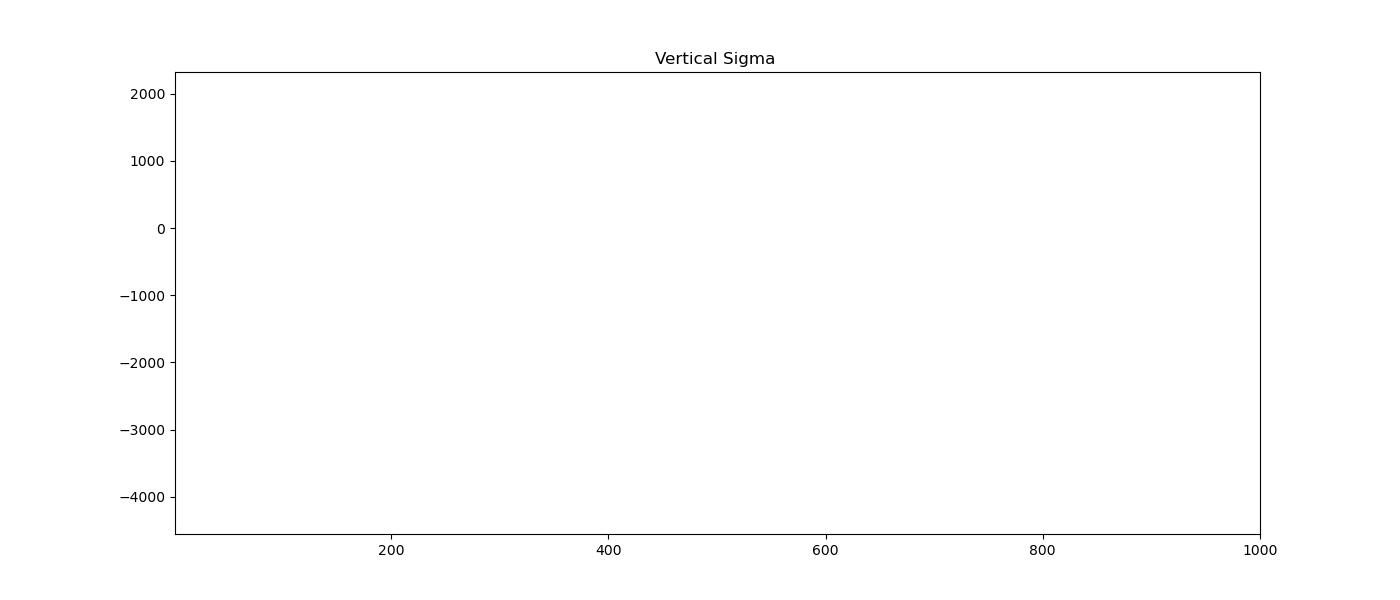

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl

fig, ax = plt.subplots(figsize=(14,6))

# optional: set limits for clarity
ax.set_xlim(min(x3), max(x3))
ax.set_ylim(data3_sigma.min(), data3_sigma.max())
ax.set_title("Vertical Sigma ")
# list to store all plotted lines
lines = []

# add frame number text
frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.7))

def update(frame):
    # plot a new line for each frame
    line, = ax.plot(x3, data3_sigma[frame*50, :], alpha=0.3)  # alpha for fading effect
    lines.append(line)
    frame_text.set_text(f'Bunch: {frame*50}')
    return lines + [frame_text]

ani = animation.FuncAnimation(fig, update, frames=range(200), blit=False, interval=50, repeat=False)
#ani.save('vertical_sigma_accumulating.mp4', writer='ffmpeg', fps=20)


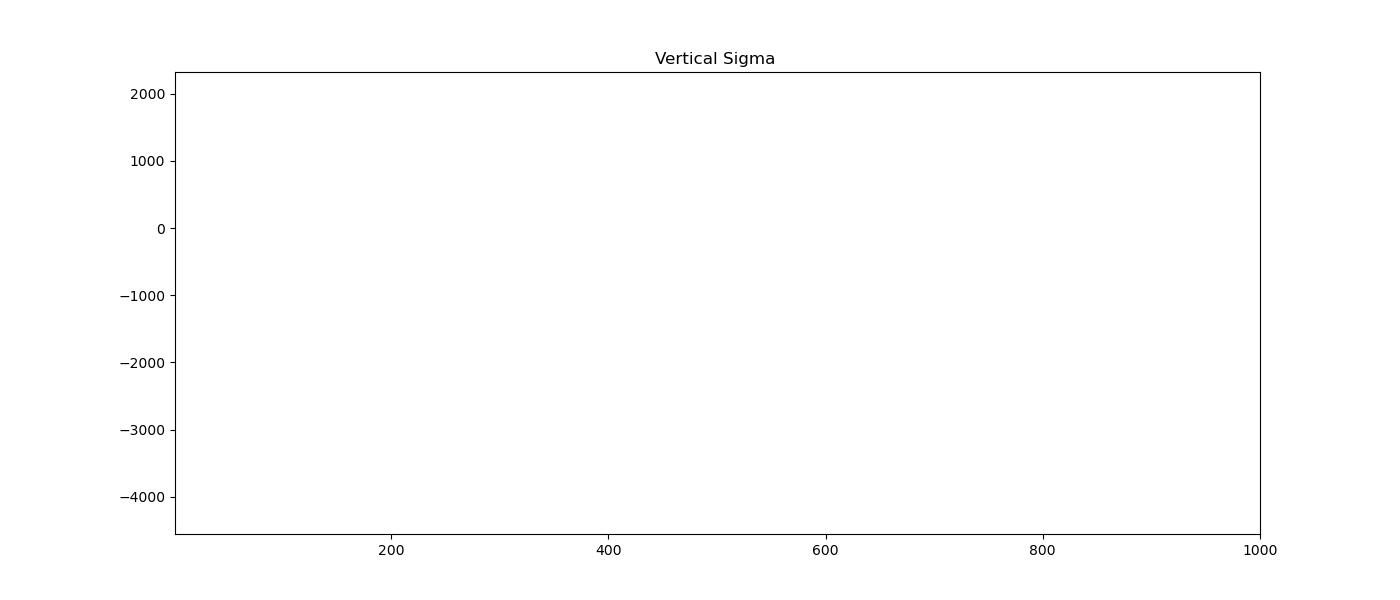

In [31]:

%matplotlib ipympl

fig, ax = plt.subplots(figsize=(14,6))

ax.set_xlim(np.min(x3), np.max(x3))
ax.set_ylim(np.nanmin(data3_sigma), np.nanmax(data3_sigma))
ax.set_title("Vertical Sigma ")
lines = []            # store plotted Line2D objects
KEEP = 10

frame_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12,
                     bbox=dict(facecolor='white', alpha=0.4))

def update(frame):
    # plot the new frame as a new line
    line, = ax.plot(x3, data3_sigma[frame*50, :], alpha=0.4)
    lines.append(line)

    # if we have more than KEEP, remove the oldest from axes and list
    if len(lines) > KEEP:
        old = lines.pop(0)
        old.remove()   # remove from axes so it no longer draws

    # update text
    frame_text.set_text(f'Bunch: {frame*50}')
    return []   # blit=False ignores returned artists
               # (we still return nothing; matplotlib redraws whole canvas)
               
ani = animation.FuncAnimation(fig, update, frames=range(200), blit=False, interval=50,repeat=False)
#ani.save('vertical_sigma_vanishing.mp4', writer='ffmpeg', fps=20)